# Practice Assignment

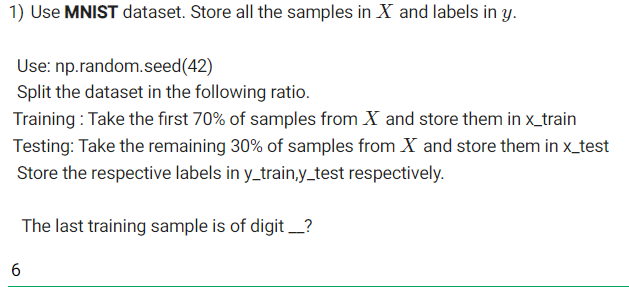

In [1]:
import numpy as np
import pandas as pd
np.random.seed(42)

In [2]:
from sklearn.datasets import fetch_openml
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=False, test_size=0.3)

In [4]:
y_train.iloc[-1]

'6'

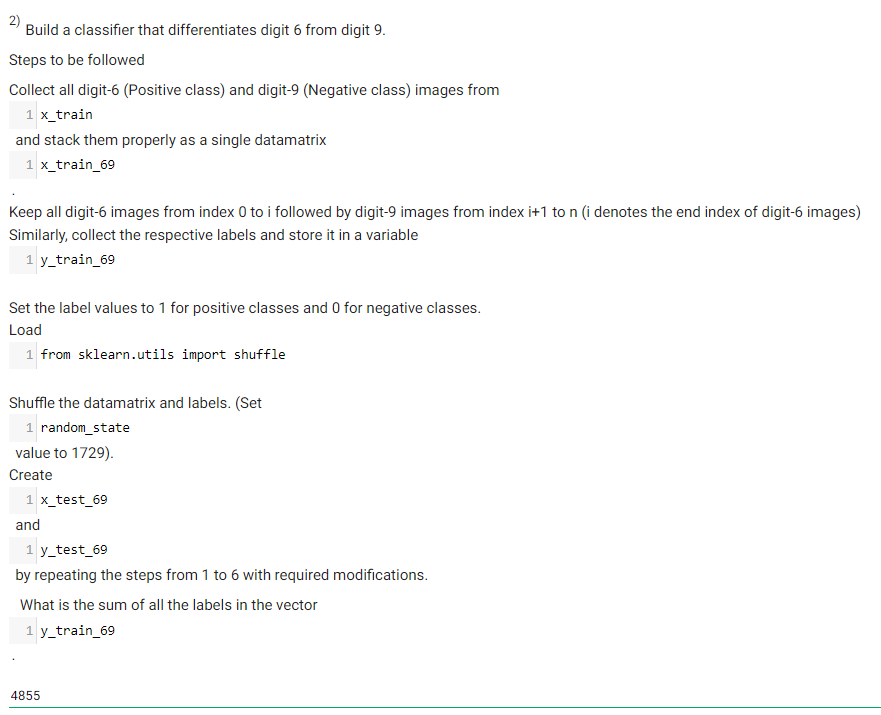

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((49000, 784), (21000, 784), (49000,), (21000,))

In [6]:
train6,train9,test6,test9 = np.where(y_train=='6',True,False), np.where(y_train=='9',True,False), np.where(y_test=='6',True,False), np.where(y_test=='9',True,False)
X_train69 = pd.concat((X_train[train6],X_train[train9]))
X_test69 = pd.concat((X_test[test6],X_test[test9]))
y_train69 = np.concatenate((np.ones(y_train[train6].shape[0]),np.zeros(y_train[train9].shape[0])))
y_test69 = np.concatenate((np.ones(y_test[test6].shape[0]),np.zeros(y_test[test9].shape[0])))

In [7]:
train6.shape,train9.shape,train6.shape,train9.shape

((49000,), (49000,), (49000,), (49000,))

In [8]:
X_train69.shape, X_test69.shape,y_train69.shape,y_test69.shape

((9746, 784), (4088, 784), (9746,), (4088,))

In [9]:
from sklearn.utils import shuffle
X_train_shuffled, y_train_shuffled = shuffle(X_train69, y_train69, random_state=1729)
X_test_shuffled, y_test_shuffled = shuffle(X_test69, y_test69, random_state=1729)

In [10]:
y_train69.sum()

4855.0

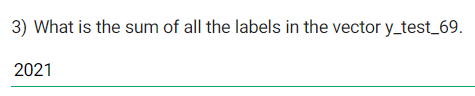

In [11]:
y_test69.sum()

2021.0

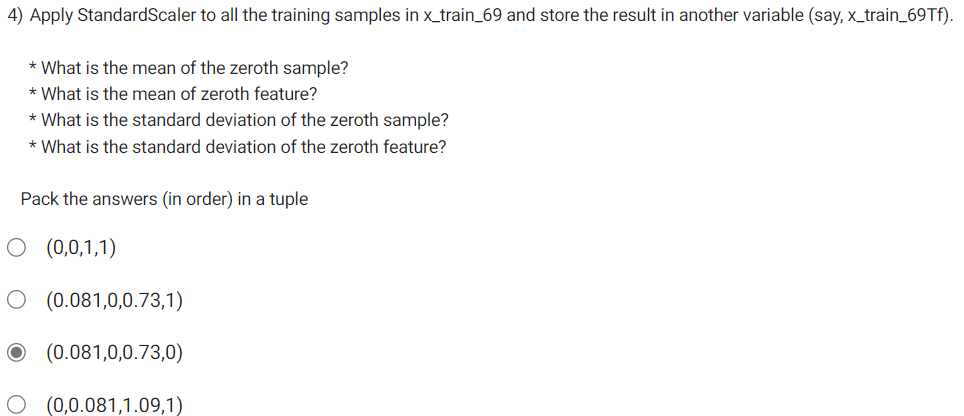

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train69tf = ss.fit_transform(X_train_shuffled)

In [13]:
round(X_train69tf[0,:].mean(),3),X_train69tf[:,0].mean(),round(X_train69tf[0,:].std(),2),X_train69tf[:,0].std()

(0.081, 0.0, 0.74, 0.0)

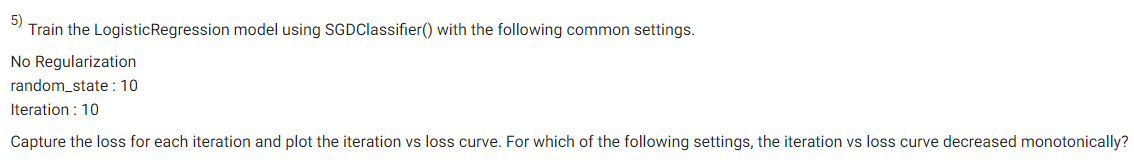

A. Set Learning rate : 0.01 and plot the curve and fit the model with `x_train_69 `<br>B.Set learning rate to 0.000001 and fit the model with `x_train_69 ` . <br>C.Keep the learning rate as 0.01. Scale the samples using StandardScaler() and fit the model with the pre-processed samples. <br>D.Use the "invscaling" stratagey for the learning rate with power_t = 1. Fit the model with x_train_69 (without pre-procesing).

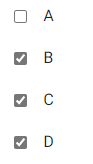

In [14]:
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

sgdA = SGDClassifier(loss='log',warm_start=True,eta0=0.01,alpha=0,learning_rate='constant', random_state=10, max_iter=1)
sgdB = SGDClassifier(loss='log',warm_start=True,eta0=0.000001,alpha=0,learning_rate='constant', random_state=10, max_iter=1)
sgdC = SGDClassifier(loss='log',warm_start=True,eta0=0.01,alpha=0,learning_rate='constant',random_state=10, max_iter=1)
make_pipe = make_pipeline(StandardScaler(), sgdC)
sgdD = SGDClassifier(loss='log',warm_start=True,eta0=0.01,alpha=0,power_t = 1,
                     learning_rate = 'invscaling', random_state=10, max_iter=1)

A_Loss,B_Loss,C_Loss,D_Loss=[],[],[],[]
for i in range(1,11):
  sgdA.fit(X_train69, y_train69)
  A_Loss.append(log_loss(sgdA.predict(X_train69),y_train69))
  sgdB.fit(X_train69, y_train69)
  B_Loss.append(log_loss(sgdB.predict(X_train69),y_train69))
  make_pipe.fit(X_train69, y_train69)
  C_Loss.append(log_loss(make_pipe.predict(X_train69),y_train69))
  sgdD.fit(X_train69, y_train69)
  D_Loss.append(log_loss(sgdD.predict(X_train69),y_train69))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

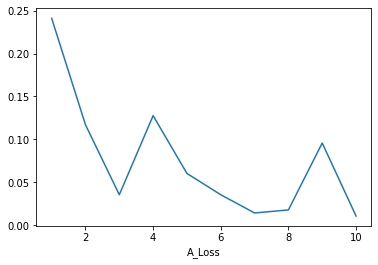

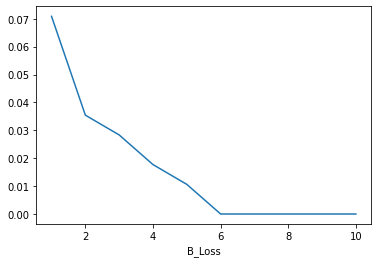

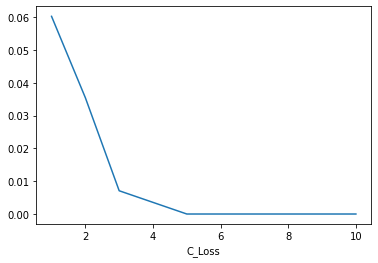

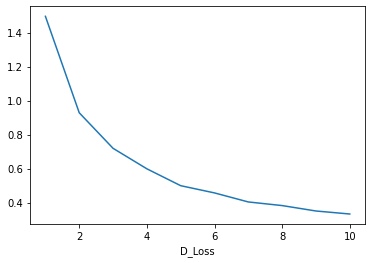

In [15]:
import matplotlib.pyplot as plt

plt.plot(range(1,11),A_Loss)
plt.xlabel('A_Loss')
plt.show()

plt.plot(range(1,11),B_Loss)
plt.xlabel('B_Loss')
plt.show()

plt.plot(range(1,11), C_Loss)
plt.xlabel('C_Loss')
plt.show()

plt.plot(range(1,11), D_Loss)
plt.xlabel('D_Loss')
plt.show()

# Graded Assignment

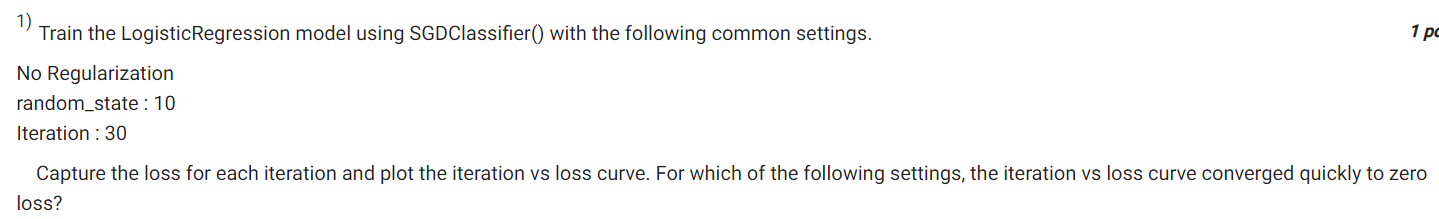

 A. Set Learning rate : 0.01 and plot the curve and fit the model with `x_train_69 

  B.Set learning rate to 0.000001 and fit the model with `x_train_69 ` .
  
  C.Keep the learning rate as 0.01. Scale the samples using StandardScaler() and fit the model with the pre-processed samples.
  
  D.Use the "invscaling" stratagey for the learning rate with power_t = 1. Fit the model with x_train_69 (without pre-procesing).

  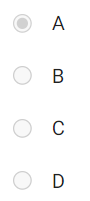

In [27]:
y_train_shuffled

array([1., 0., 1., ..., 1., 1., 1.])

In [29]:
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

sgdA = SGDClassifier(loss='log',warm_start=True,eta0=0.01,alpha=0,learning_rate='constant', random_state=10, max_iter=1)
sgdB = SGDClassifier(loss='log', penalty='l2', max_iter=1, warm_start=True, eta0=0.000001, alpha=0, learning_rate='constant', random_state=10)
sgdC = SGDClassifier(loss='log',warm_start=True,eta0=0.01,alpha=0,learning_rate='constant',random_state=10, max_iter=1)

sgdD = SGDClassifier(loss='log',warm_start=True,eta0=0.01,alpha=0,power_t = 1,
                     learning_rate = 'invscaling', random_state=10, max_iter=1)

mpA = make_pipeline(sgdA)
mpB = make_pipeline(sgdB)
mpC = make_pipeline(StandardScaler(), sgdC)
mpD = make_pipeline(sgdD)
A_Loss,B_Loss,C_Loss,D_Loss=[],[],[],[]
for i in range(1,31):
  sgdA.fit(X_train_shuffled, y_train_shuffled)
  A_Loss.append(log_loss(y_train_shuffled,mpA.predict_proba(X_train_shuffled)))
  sgdB.fit(X_train_shuffled, y_train_shuffled)
  B_Loss.append(log_loss(y_train_shuffled,mpB.predict_proba(X_train_shuffled)))
  mpC.fit(X_train_shuffled, y_train_shuffled)
  C_Loss.append(log_loss(y_train_shuffled,mpC.predict_proba(X_train_shuffled)))
  sgdD.fit(X_train_shuffled, y_train_shuffled)
  D_Loss.append(log_loss(y_train_shuffled,mpD.predict_proba(X_train_shuffled)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

In [30]:
print([round(i,4) for i in A_Loss])
print([round(i,4) for i in B_Loss])
print([round(i,4) for i in C_Loss])
print([round(i,4) for i in D_Loss])

[0.0673, 0.0354, 0.1099, 0.0709, 0.0602, 0.0142, 0.078, 0.0992, 0.0071, 0.0035, 0.0319, 0.0106, 0.0106, 0.0354, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0072, 0.0051, 0.0039, 0.0031, 0.0025, 0.0021, 0.0017, 0.0014, 0.0012, 0.0011, 0.001, 0.0009, 0.0008, 0.0007, 0.0007, 0.0006, 0.0006, 0.0006, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004]
[0.0048, 0.0027, 0.0014, 0.0011, 0.0009, 0.0008, 0.0007, 0.0006, 0.0006, 0.0005, 0.0005, 0.0004, 0.0004, 0.0004, 0.0004, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002]
[0.4599, 0.4016, 0.3546, 0.2933, 0.2731, 0.2535, 0.2357, 0.2255, 0.2185, 0.2118, 0.2053, 0.1912, 0.1899, 0.1779, 0.1728, 0.1657, 0.1633, 0.164, 0.1569, 0.1567, 0.1578, 0.1581, 0.1544, 0.1494, 0.1539, 0.1493, 0.1481, 0.1479, 0.1429, 0.1446]


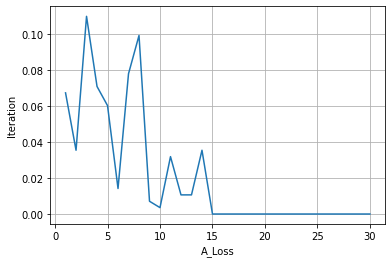

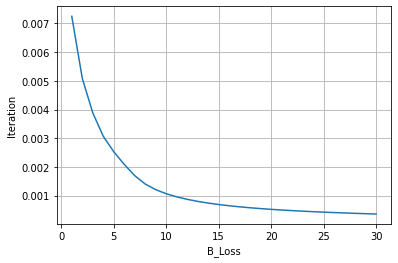

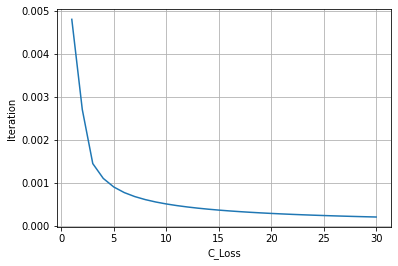

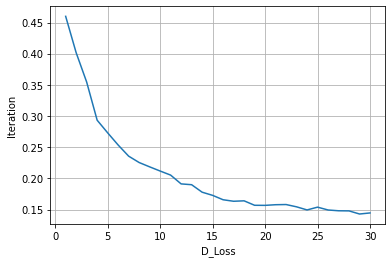

In [31]:
import matplotlib.pyplot as plt

plt.plot(range(1,31),A_Loss)
plt.grid(True)
plt.ylabel('Iteration')
plt.xlabel('A_Loss')
plt.show()

plt.plot(range(1,31),B_Loss)
plt.grid(True)
plt.ylabel('Iteration')
plt.xlabel('A_Loss')
plt.xlabel('B_Loss')
plt.show()

plt.plot(range(1,31), C_Loss)
plt.grid(True)
plt.ylabel('Iteration')
plt.xlabel('A_Loss')
plt.xlabel('C_Loss')
plt.show()

plt.plot(range(1,31), D_Loss)
plt.grid(True)
plt.ylabel('Iteration')
plt.xlabel('A_Loss')
plt.xlabel('D_Loss')
plt.show()

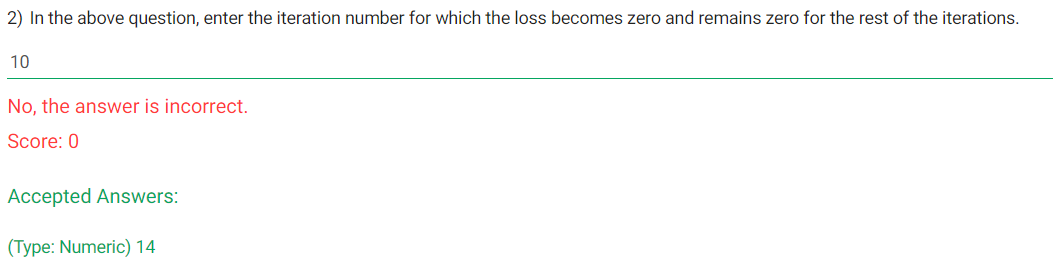

In [32]:
A = [round(i,4) for i in A_Loss]
A.index(0)

14

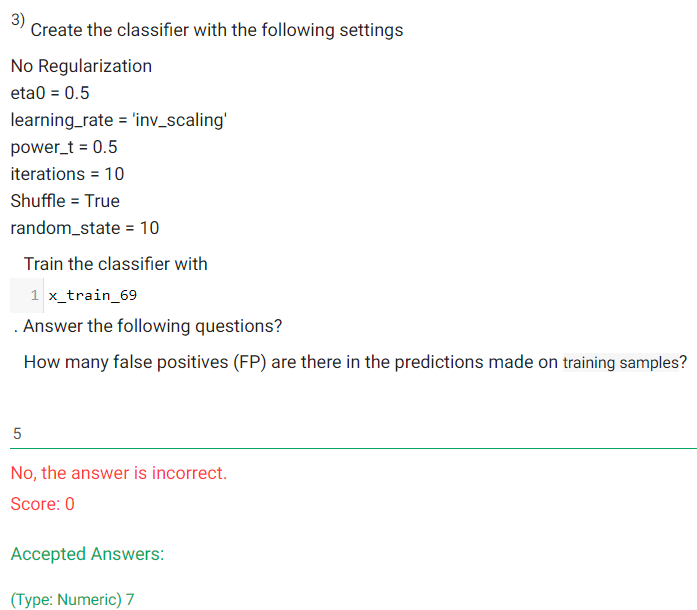

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


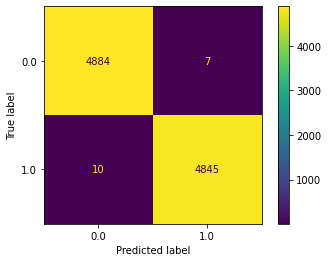

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log',penalty='l2',warm_start=False,eta0=0.5,
                    power_t=0.5,alpha=0,learning_rate='invscaling',
                    random_state=10, max_iter=10)
sgd.fit(X_train_shuffled, y_train_shuffled)
y_pred = sgd.predict(X_train_shuffled)
ConfusionMatrixDisplay.from_predictions(y_train_shuffled, y_pred)

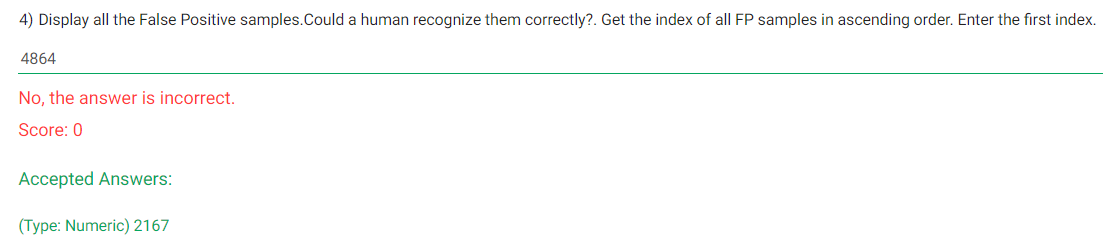

In [51]:
l = []
for i in range(y_pred.shape[0]):
  if y_train_shuffled[i]==0 and y_pred[i]==1:
    l.append(i)
l

[2167, 2407, 3036, 3368, 4217, 5556, 6230]

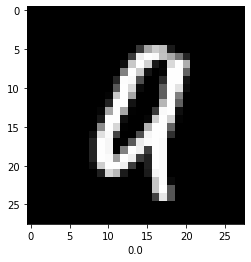

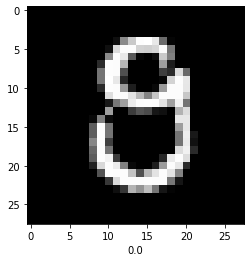

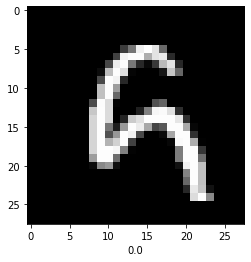

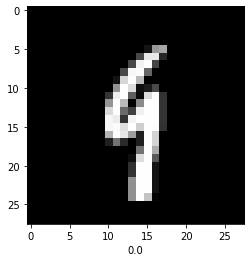

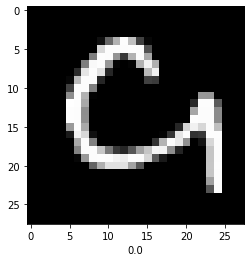

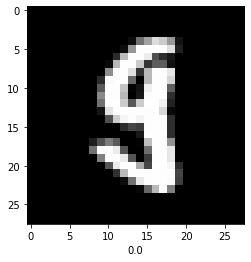

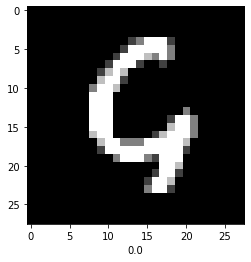

In [65]:
import matplotlib.pyplot as plt
for i in l:
  plt.imshow(X_train_shuffled.iloc[i].values.reshape(28,28),cmap='gray')
  plt.xlabel(y_train_shuffled[i])
  plt.show()

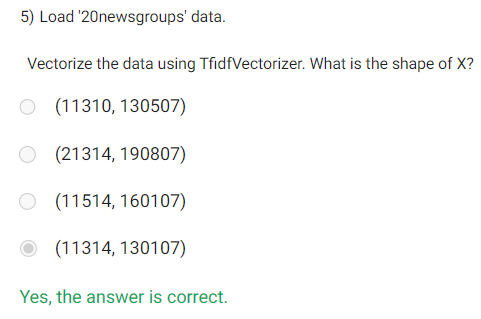

In [71]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
X = fetch_20newsgroups()

In [79]:
X_t = TfidfVectorizer().fit_transform(X.data)

In [80]:
X_t.shape

(11314, 130107)

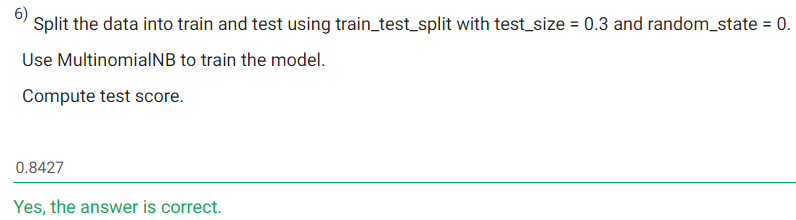

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

X_tr,X_tst,y_tr,y_tst = train_test_split(X.data, X.target, test_size=0.3, random_state=0)
make_pipe = make_pipeline(TfidfVectorizer(),MultinomialNB())
make_pipe.fit(X_tr,y_tr)
make_pipe.score(X_tst, y_tst)

0.845360824742268